In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
data = pd.read_csv('London Property Listings Dataset.csv')

In [14]:
data.head()

,Price,Property Type,Bedrooms,Bathrooms,Size,Postcode,Area,Price_Category,Area_Avg_Price
0,330000.0,Apartment,1.0,1.0,518.0,E14,Eastern,Low,1.001684e+06
1,340000.0,Flat,1.0,1.0,1.0,E14,Eastern,Low,1.001684e+06
2,340000.0,Apartment,1.0,1.0,2.0,E14,Eastern,Low,1.001684e+06
3,340000.0,Flat,1.0,1.0,1.0,E14,Eastern,Low,1.001684e+06
4,340000.0,Flat,1.0,1.0,388.0,SW20,South Western,Low,1.516724e+06


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29537 entries, 0 to 29536
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           29537 non-null  float64
 1   Property Type   29537 non-null  object 
 2   Bedrooms        29537 non-null  float64
 3   Bathrooms       29537 non-null  float64
 4   Size            29537 non-null  float64
 5   Postcode        29537 non-null  object 
 6   Area            29537 non-null  object 
 7   Price_Category  29537 non-null  object 
 8   Area_Avg_Price  29537 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.0+ MB


In [16]:
data = data.drop(['Postcode', 'Bathrooms', 'Price_Category','Size','Area'], axis=1, errors='ignore')

In [17]:
data.head()

,Price,Property Type,Bedrooms,Area_Avg_Price
0,330000.0,Apartment,1.0,1.001684e+06
1,340000.0,Flat,1.0,1.001684e+06
2,340000.0,Apartment,1.0,1.001684e+06
3,340000.0,Flat,1.0,1.001684e+06
4,340000.0,Flat,1.0,1.516724e+06


In [18]:
data.isnull().sum()

Price             0
Property Type     0
Bedrooms          0
Area_Avg_Price    0
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

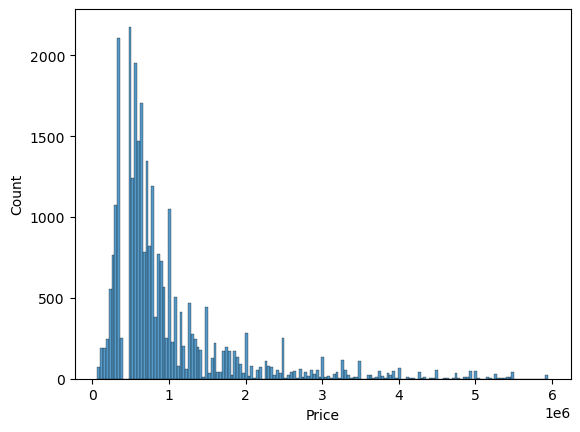

In [19]:
sns.histplot(data=data, x='Price')

In [20]:
data.duplicated().sum()

19088

In [21]:
data.head()

,Price,Property Type,Bedrooms,Area_Avg_Price
0,330000.0,Apartment,1.0,1.001684e+06
1,340000.0,Flat,1.0,1.001684e+06
2,340000.0,Apartment,1.0,1.001684e+06
3,340000.0,Flat,1.0,1.001684e+06
4,340000.0,Flat,1.0,1.516724e+06


In [22]:
data['Area'].value_counts().plot(kind='bar')

KeyError: 'Area'

In [23]:
data['Property Type'].astype('category').cat.codes

0        0
1        1
2        0
3        1
4        1
        ..
29532    1
29533    1
29534    1
29535    1
29536    3
Length: 29537, dtype: int8

In [24]:
data.head()

,Price,Property Type,Bedrooms,Area_Avg_Price
0,330000.0,Apartment,1.0,1.001684e+06
1,340000.0,Flat,1.0,1.001684e+06
2,340000.0,Apartment,1.0,1.001684e+06
3,340000.0,Flat,1.0,1.001684e+06
4,340000.0,Flat,1.0,1.516724e+06


In [25]:
#Encoding
oe = OrdinalEncoder()

oe.fit(data[['Property Type']])

OrdinalEncoder()

In [26]:
oe.categories_

[array(['Apartment', 'Flat', 'House', 'Semi-Detached', 'Terraced'],
       dtype=object)]

In [27]:
data['Property Type'] = oe.transform(data[['Property Type']])

In [28]:
data

,Price,Property Type,Bedrooms,Area_Avg_Price
0,330000.0,0.0,1.0,1.001684e+06
1,340000.0,1.0,1.0,1.001684e+06
2,340000.0,0.0,1.0,1.001684e+06
3,340000.0,1.0,1.0,1.001684e+06
4,340000.0,1.0,1.0,1.516724e+06
...,...,...,...,...
29532,795000.0,1.0,3.0,1.516724e+06
29533,795000.0,1.0,2.0,1.001684e+06
29534,795000.0,1.0,2.0,6.921048e+05
29535,795000.0,1.0,2.0,1.516724e+06


In [29]:
oe.inverse_transform(data[['Property Type']])

array([['Apartment'],
       ['Flat'],
       ['Apartment'],
       ...,
       ['Flat'],
       ['Flat'],
       ['Semi-Detached']], dtype=object)

In [30]:
X = data.iloc[:, 1:4]
Y = data[['Price']]

In [51]:
#Scaling - Ignore cat columns for scaling
X_scaller = StandardScaler()
Y_scaller = StandardScaler()

X_scalled = pd.DataFrame(X_scaller.fit_transform(X), columns=X.columns)
X_scalled

,Property Type,Bedrooms,Area_Avg_Price
0,-0.882327,-1.125508,-0.475813
1,-0.063330,-1.125508,-0.475813
2,-0.882327,-1.125508,-0.475813
3,-0.063330,-1.125508,-0.475813
4,-0.063330,-1.125508,1.156109
...,...,...,...
29532,-0.063330,0.657306,1.156109
29533,-0.063330,-0.234101,-0.475813
29534,-0.063330,-0.234101,-1.456726
29535,-0.063330,-0.234101,1.156109


In [32]:
X

,Property Type,Bedrooms,Area_Avg_Price
0,0.0,1.0,1.001684e+06
1,1.0,1.0,1.001684e+06
2,0.0,1.0,1.001684e+06
3,1.0,1.0,1.001684e+06
4,1.0,1.0,1.516724e+06
...,...,...,...
29532,1.0,3.0,1.516724e+06
29533,1.0,2.0,1.001684e+06
29534,1.0,2.0,6.921048e+05
29535,1.0,2.0,1.516724e+06


In [33]:
Y_scalled = Y_scaller.fit_transform(Y)

In [34]:
Y_scalled

array([[-0.74730292],
       [-0.73553874],
       [-0.73553874],
       ...,
       [-0.20026819],
       [-0.20026819],
       [-0.20026819]])

In [35]:
#Split the data into train and test
X_train, X_test, Y_train,Y_test = train_test_split(X_scalled,Y_scalled, test_size=0.2,random_state=23)

In [36]:
X_train.shape

(23629, 3)

In [37]:
Y_train.shape

(23629, 1)

In [38]:
#fit
model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [39]:
predictions_test = model.predict(X_test)

In [40]:
predictions_test

array([[-0.11553935],
       [ 0.32619601],
       [ 1.12352285],
       ...,
       [-0.10298396],
       [-0.51848196],
       [-0.11553935]])

In [41]:
Y_test

array([[-0.50613707],
       [ 0.12912907],
       [-0.48849079],
       ...,
       [-0.04733375],
       [-0.48849079],
       [ 0.74674893]])

In [42]:
mse = mean_squared_error(Y_test, predictions_test)
mse

0.7003994555005334

In [43]:
X

,Property Type,Bedrooms,Area_Avg_Price
0,0.0,1.0,1.001684e+06
1,1.0,1.0,1.001684e+06
2,0.0,1.0,1.001684e+06
3,1.0,1.0,1.001684e+06
4,1.0,1.0,1.516724e+06
...,...,...,...
29532,1.0,3.0,1.516724e+06
29533,1.0,2.0,1.001684e+06
29534,1.0,2.0,6.921048e+05
29535,1.0,2.0,1.516724e+06


In [44]:
model.coef_

array([[-0.14078147,  0.53146741,  0.2493099 ]])

In [45]:
model.intercept_

array([0.00328725])

In [46]:
data.head()

,Price,Property Type,Bedrooms,Area_Avg_Price
0,330000.0,0.0,1.0,1.001684e+06
1,340000.0,1.0,1.0,1.001684e+06
2,340000.0,0.0,1.0,1.001684e+06
3,340000.0,1.0,1.0,1.001684e+06
4,340000.0,1.0,1.0,1.516724e+06


In [47]:
variance = np.var(Y_test)
print(f"MSE: {mse}")
print(f"Variance of Y_test: {variance}")

MSE: 0.7003994555005334
Variance of Y_test: 0.9879222195942247


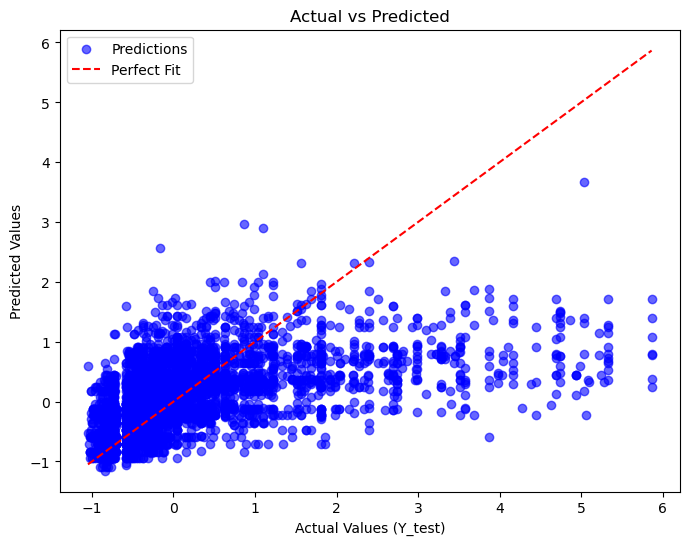

In [48]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predictions_test, alpha=0.6, color='blue', label='Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', label='Perfect Fit')  # Ideal line
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [49]:
# Flatten the arrays
Y_test_flat = Y_test.ravel()  # Convert (5908, 1) to (5908,)
predictions_test_flat = predictions_test.ravel()

# Create the DataFrame
results = pd.DataFrame({
    'Actual Values': Y_test_flat,
    'Predicted Values': predictions_test_flat
})

# Display the first few rows
print(results.head(10))

   Actual Values  Predicted Values
0      -0.506137         -0.115539
1       0.129129          0.326196
2      -0.488491          1.123523
3      -0.900237         -0.833845
4      -0.429670          0.176015
5      -0.530254         -0.518482
6      -0.382613         -0.230839
7      -0.294382         -0.589293
8       2.981945          1.273704
9       1.805526         -0.115539


In [50]:
print(Y_test.shape)
print(predictions_test.shape)

(5908, 1)
(5908, 1)
